## K-Nearest Neighbors (KNN): In-Depth Tutorial

### Introduction to K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm that can be used for both classification and regression tasks. It classifies or predicts the output based on the 'k' closest training examples in the feature space.

### Mathematical Background

1. **Distance Metric**:
   - KNN relies on a distance metric to determine the closest neighbors. The most common distance metric is Euclidean distance.
   
   The Euclidean distance between two points $ x = (x_1, x_2, \ldots, x_n) $ and $ y = (y_1, y_2, \ldots, y_n) $ is given by:
   
   $$
   d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
   $$

2. **Classification Decision Rule**:
   - For classification, KNN assigns the class based on the majority vote of the nearest neighbors.
   
   $$
   \hat{y} = \text{mode}(y_1, y_2, \ldots, y_k)
   $$

3. **Regression Decision Rule**:
   - For regression, KNN predicts the output as the average of the nearest neighbors.
   
   $$
   \hat{y} = \frac{1}{k} \sum_{i=1}^{k} y_i
   $$

### Numerical Example

Let's consider a simple 2D example for KNN classification. Assume we have the following training data:

| X1 | X2 | Class |
|----|----|-------|
| 1  | 2  | A     |
| 2  | 3  | A     |
| 3  | 3  | B     |
| 6  | 6  | B     |
| 7  | 8  | B     |
| 8  | 8  | A     |

We want to classify a new point $ P = (4, 4) $ using $ k = 3 $.

1. **Calculate Distances**:
   - Distance to (1, 2): $ \sqrt{(4-1)^2 + (4-2)^2} = \sqrt{9 + 4} = \sqrt{13} \approx 3.6 $
   - Distance to (2, 3): $ \sqrt{(4-2)^2 + (4-3)^2} = \sqrt{4 + 1} = \sqrt{5} \approx 2.2 $
   - Distance to (3, 3): $ \sqrt{(4-3)^2 + (4-3)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.4 $
   - Distance to (6, 6): $ \sqrt{(4-6)^2 + (4-6)^2} = \sqrt{4 + 4} = \sqrt{8} \approx 2.8 $
   - Distance to (7, 8): $ \sqrt{(4-7)^2 + (4-8)^2} = \sqrt{9 + 16} = \sqrt{25} = 5 $
   - Distance to (8, 8): $ \sqrt{(4-8)^2 + (4-8)^2} = \sqrt{16 + 16} = \sqrt{32} \approx 5.7 $

2. **Find Nearest Neighbors**:
   - Nearest 3 neighbors: (3, 3) [B], (2, 3) [A], (6, 6) [B]

3. **Majority Vote**:
   - Classes of nearest neighbors: [B, A, B]
   - Majority class: B

Thus, the new point $ P = (4, 4) $ is classified as class B.



### Assumptions Behind KNN

1. **Instance-Based Learning**:
   - KNN is a type of instance-based learning or lazy learning where the function is only approximated locally and all computation is deferred until function evaluation.

2. **Similarity Measure**:
   - Assumes that similar instances exist close to each other. The proximity or distance metric (commonly Euclidean distance) is a critical assumption that dictates how the closeness of instances is measured.

3. **Consistent Feature Scaling**:
   - Assumes that features have been scaled consistently. KNN is sensitive to the scale of the data and requires features to be normalized or standardized.

4. **Sufficient and Representative Data**:
   - Assumes that there is enough data available to make meaningful predictions. The presence of sufficient representative data points is essential for the model's performance.

### Bias-Variance Trade-off

**Bias**:
- **High Bias**:
  - KNN with a large value of K (many neighbors) can lead to high bias as it creates smoother decision boundaries and may underfit the training data.

**Variance**:
- **High Variance**:
  - KNN with a small value of K (few neighbors) can lead to high variance as it captures noise and details specific to the training data, leading to overfitting.

**Trade-off**:
- **Balance**:
  - The goal is to find an optimal value of K that balances bias and variance to ensure good performance on both training and unseen test data.

### Advantages and Disadvantages of KNN

**Advantages**:
1. **Simplicity**:
   - Easy to implement and understand.
   
2. **No Training Phase**:
   - KNN is a lazy learner, meaning it doesn't involve a training phase, making it easy to update with new data.

3. **Versatile**:
   - Can be used for both classification and regression problems.

4. **No Assumptions**:
   - Makes no assumptions about the underlying data distribution.

**Disadvantages**:
1. **Computationally Intensive**:
   - High memory and computation costs, especially for large datasets, as it stores all training instances.

2. **Sensitive to Noise**:
   - Can be significantly affected by noisy or irrelevant features.

3. **Curse of Dimensionality**:
   - Performance degrades with an increase in the number of dimensions due to the sparsity of data points.

4. **Requires Feature Scaling**:
   - Features need to be normalized or standardized to ensure fair distance calculation.

### Conclusion

KNN is a simple yet powerful algorithm for classification and regression tasks. Its effectiveness depends heavily on the choice of distance metric, the value of K, and the quality of the feature scaling. While it offers several advantages like simplicity and versatility, it also has notable drawbacks, particularly in computational efficiency and sensitivity to high-dimensional data and noise.


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


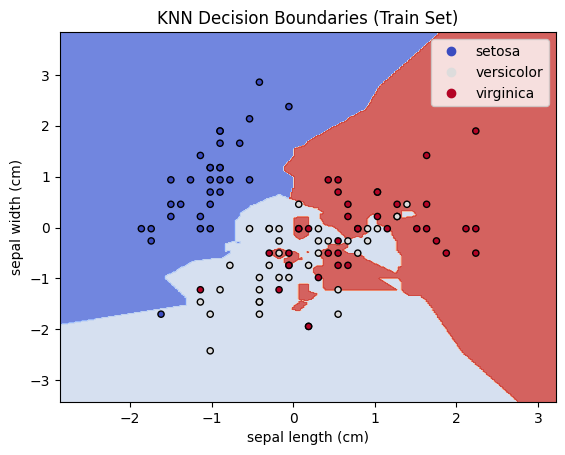

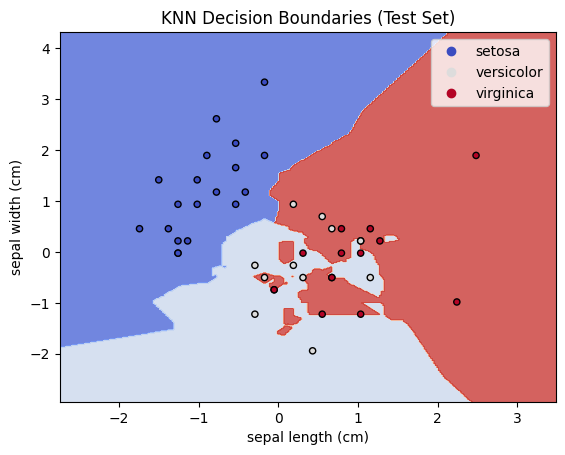

In [4]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plotting decision boundaries (for visualization purpose, use first two features)
def plot_decision_boundaries(X, y, model, title, feature_names):
    # Create a mesh to plot the decision boundaries
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Plot the decision boundary by assigning a color to each point in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

    # Plot also the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    # Create a legend
    handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.coolwarm(i / 2), linestyle='') for i in range(3)]
    plt.legend(handles, iris.target_names)

    plt.show()

# Train a KNN model on only the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

knn_2d = KNeighborsClassifier(n_neighbors=3)
knn_2d.fit(X_train_2d, y_train)

# Visualize the decision boundaries (using only the first two features for simplicity)
plot_decision_boundaries(X_train_2d, y_train, knn_2d, "KNN Decision Boundaries (Train Set)", iris.feature_names[:2])
plot_decision_boundaries(X_test_2d, y_test, knn_2d, "KNN Decision Boundaries (Test Set)", iris.feature_names[:2])
